In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class_data = pd.read_csv('/content/classData.csv')
print(class_data.head(10))


   G  C  B  A          Ia          Ib          Ic        Va        Vb  \
0  1  0  0  1 -151.291812   -9.677452   85.800162  0.400750 -0.132935   
1  1  0  0  1 -336.186183  -76.283262   18.328897  0.312732 -0.123633   
2  1  0  0  1 -502.891583 -174.648023  -80.924663  0.265728 -0.114301   
3  1  0  0  1 -593.941905 -217.703359 -124.891924  0.235511 -0.104940   
4  1  0  0  1 -643.663617 -224.159427 -132.282815  0.209537 -0.095554   
5  1  0  0  1 -632.312778 -181.714572  -90.795453  0.193116 -0.086144   
6  1  0  0  1 -557.391809 -119.468643  -29.529450  0.210004 -0.076712   
7  1  0  0  1 -458.799929  -96.318922   -7.381847  0.273652 -0.067262   
8  1  0  0  1 -385.668729  -97.989839  -10.076824  0.334649 -0.057795   
9  1  0  0  1 -359.929338  -87.319478   -0.452216  0.347420 -0.048314   

         Vc  
0 -0.267815  
1 -0.189099  
2 -0.151428  
3 -0.130570  
4 -0.113983  
5 -0.106972  
6 -0.133291  
7 -0.206389  
8 -0.276853  
9 -0.299106  


In [ ]:
x = class_data[["Ia","Ib","Ic","Va","Vb","Vc"]].values
y = class_data[["G", "C", "B", "A"]].values

print("shape of features data: ",x.shape)
print("shape of target data: ",y.shape)

shape of features data:  (7861, 6)
shape of target data:  (7861, 4)


In [ ]:
def relu(x):
  return np.maximum(0, x)
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [ ]:
def dense(a_in , w ,b,f):
  units = w.shape[1]
  a_out = np.zeros(units)
  for i in range(units):
    w_j = w[:,i]
    z = np.dot(w_j , a_in) +b[i]
    a_out[i] = f(z)
  return a_out

In [ ]:
def layer(x,w1,b1,w2,b2):
  a1 = dense(x,w1,b1,relu)
  a2 = dense(a1,w2,b2,sigmoid)
  return a2

In [ ]:
ip_size = x.shape[1]
print(ip_size)
layer_size = 5
op_size = y.shape[1]
print(op_size)

w1 = np.random.rand(ip_size,layer_size)*0.01
b1 = np.random.rand(layer_size)
w2 = np.random.rand(layer_size,op_size)*0.01
b2 = np.random.rand(op_size)



6
4


In [ ]:
def cross_entropy(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))
    return loss

In [ ]:
sample_input = x[0, :]
sample_target = y[0, :]

prediction = layer(sample_input, w1, b1, w2, b2)
loss = cross_entropy(sample_target, prediction)

threshold = 0.5
prediction_binary = (prediction > threshold).astype(int)


print("Prediction:", prediction)
print("Prediction Binary:", prediction_binary)
print("actual :", sample_target)

loss = cross_entropy(sample_target, prediction)
print("Loss:", loss)


Prediction: [0.53895839 0.61756467 0.67339014 0.64267577]
Prediction Binary: [1 1 1 1]
actual : [1 0 0 1]
Loss: 0.7851041186078747


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)


scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


Epoch 1/1000, Loss: 0.678279379043946
Epoch 2/1000, Loss: 0.6410042462481739
Epoch 3/1000, Loss: 0.2836501720794365
Epoch 4/1000, Loss: 0.2323926280458198
Epoch 5/1000, Loss: 0.21518941670111297
Epoch 6/1000, Loss: 0.20807364421523686
Epoch 7/1000, Loss: 0.20364263330123766
Epoch 8/1000, Loss: 0.19850155192942878
Epoch 9/1000, Loss: 0.1962908146812492
Epoch 10/1000, Loss: 0.1930801462354105
Epoch 11/1000, Loss: 0.19097295104579454
Epoch 12/1000, Loss: 0.18988632072644387
Epoch 13/1000, Loss: 0.18912857521079596
Epoch 14/1000, Loss: 0.1887406853251739
Epoch 15/1000, Loss: 0.18822488292634512
Epoch 16/1000, Loss: 0.1874179881311766
Epoch 17/1000, Loss: 0.1866383930218645
Epoch 18/1000, Loss: 0.18648411958241554
Epoch 19/1000, Loss: 0.1860201321046328
Epoch 20/1000, Loss: 0.18599904065507583
Epoch 21/1000, Loss: 0.1854299701430789
Epoch 22/1000, Loss: 0.1846518666746029
Epoch 23/1000, Loss: 0.18324986627743614
Epoch 24/1000, Loss: 0.18149916735665164
Epoch 25/1000, Loss: 0.180126124218452

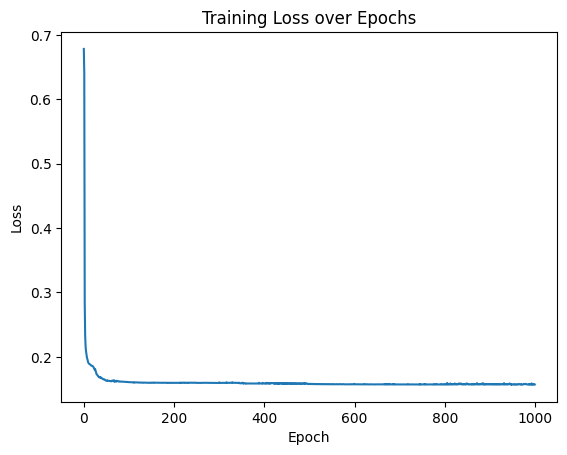

In [ ]:
def relu_derivative(x):
  return (x>0).astype(float)

def sigmoid_derivative(x):
  return x*(1-x)

def back_prop(x, y, w1, b1, w2, b2):
  #forward pass
  z1 = np.dot(x,w1) + b1
  a1 = relu(z1)
  z2 = np.dot(a1,w2) + b2
  a2 = sigmoid(z2)

  #backward flow
  epsilon = 1e-15
  a2 = np.clip(a2, epsilon, 1 - epsilon)

  dloss_a2 = (a2-y)/(a2*(1-a2))

  #second layer's gradient descending
  d_a2_z2 = sigmoid_derivative(a2)
  d_loss_z2 = dloss_a2 * d_a2_z2

  d_loss_w2 = np.outer(a1, d_loss_z2)
  d_loss_b2 = d_loss_z2

  #first layer's gradient descending
  d_z2_a1 = w2
  d_loss_a1 = np.dot(d_loss_z2, d_z2_a1.T)
  d_a1_z1 = relu_derivative(z1)
  d_loss_z1 = d_loss_a1 * d_a1_z1

  d_loss_w1 = np.outer(x, d_loss_z1)
  d_loss_b1 = d_loss_z1

  return d_loss_w1, d_loss_b1, d_loss_w2, d_loss_b2


epoches = 1000
learning_rate = 0.01
losses = []

for epoch in range(epoches):
  total_loss = 0
  for i in range(len(x_train_scaled)):
    x_in = x_train_scaled[i, :]
    y_in = y_train[i, :]

    prediction = layer(x_in, w1, b1, w2, b2)
    loss = cross_entropy(y_in, prediction)
    total_loss += loss

    d_loss_w1, d_loss_b1, d_loss_w2, d_loss_b2 = back_prop(x_in, y_in, w1, b1, w2, b2)

    w1 -= learning_rate * d_loss_w1
    b1 -= learning_rate * d_loss_b1
    w2 -= learning_rate * d_loss_w2
    b2 -= learning_rate * d_loss_b2

  epoch_loss = 0
  for i in range(x_train_scaled.shape[0]):
    x_sample = x_train_scaled[i, :]
    y_sample = y_train[i, :]

    z1 = np.dot(x_sample, w1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1,w2) + b2
    a2 = sigmoid(z2)
    epoch_loss += cross_entropy(y_sample, a2)

  avg_loss = epoch_loss / x_train_scaled.shape[0]
  losses.append(avg_loss)
  print(f"Epoch {epoch+1}/{epoches}, Loss: {avg_loss}")

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.show()


In [ ]:
random_index = np.random.randint(0, len(x_test_scaled))

random_ip = x_test_scaled[random_index, :]
actual_target = y_test[random_index, :]

raw_prediction = layer(random_ip, w1, b1, w2, b2)

threshold = 0.5
binary_prediction = (raw_prediction > threshold).astype(int)

if np.array_equal(binary_prediction, [0, 0, 0, 0]):
    predicted_fault_name = 'No Fault'
if np.array_equal(actual_target, [0, 0, 0, 0]):
    actual_fault_name = 'No Fault'

if np.array_equal(binary_prediction, [1, 0, 0, 1]):
    predicted_fault_name = 'LG fault (Between Phase A and Gnd)'
if np.array_equal(actual_target, [1, 0, 0, 1]):
    actual_fault_name = 'LG fault (Between Phase A and Gnd)'

if np.array_equal(binary_prediction, [0, 0, 1, 1]):
    predicted_fault_name = 'LL fault (Between Phase A and Phase B)'
if np.array_equal(actual_target, [0, 0, 1, 1]):
    actual_fault_name = 'LL fault (Between Phase A and Phase B)'

if np.array_equal(binary_prediction, [1, 0, 1, 1]):
    predicted_fault_name = 'LLG Fault (Between Phases A,B and ground)'
if np.array_equal(actual_target, [1, 0, 1, 1]):
    actual_fault_name = 'LLG Fault (Between Phases A,B and ground)'

if np.array_equal(binary_prediction, [0, 1, 1, 1]):
    predicted_fault_name = 'LLL Fault (Between all three phases)'
if np.array_equal(actual_target, [0, 1, 1, 1]):
    actual_fault_name = 'LLL Fault (Between all three phases)'

if np.array_equal(binary_prediction, [1, 1, 1, 1]):
    predicted_fault_name = 'LLLG fault (Three phase symmetrical fault)'
if np.array_equal(actual_target, [1, 1, 1, 1]):
    actual_fault_name = 'LLLG fault (Three phase symmetrical fault)'


print("Input (from test set, scaled):", random_ip)
print("Prediction (GCBA):", binary_prediction)
print("Predicted Fault:", predicted_fault_name)
print("Actual (GCBA):", actual_target)
print("Actual Fault:", actual_fault_name)

Input (from test set, scaled): [-0.73375896 -0.0401851   0.02884144  1.31728611 -1.43426943  0.22580041]
Prediction (GCBA): [1 0 0 1]
Predicted Fault: LG fault (Between Phase A and Gnd)
Actual (GCBA): [1 0 0 1]
Actual Fault: LG fault (Between Phase A and Gnd)


In [ ]:
test_predictions_raw = np.zeros((x_test_scaled.shape[0], op_size))
for i in range(x_test_scaled.shape[0]):
    test_predictions_raw[i, :] = layer(x_test_scaled[i, :], w1, b1, w2, b2)

threshold = 0.5
test_predictions_binary = (test_predictions_raw > threshold).astype(int)

correct_predictions = np.sum(np.all(test_predictions_binary == y_test, axis=1))
total_samples = y_test.shape[0]
accuracy = correct_predictions / total_samples

print(f"Accuracy on the test set: {accuracy:.4f}")

Accuracy on the test set: 0.7444


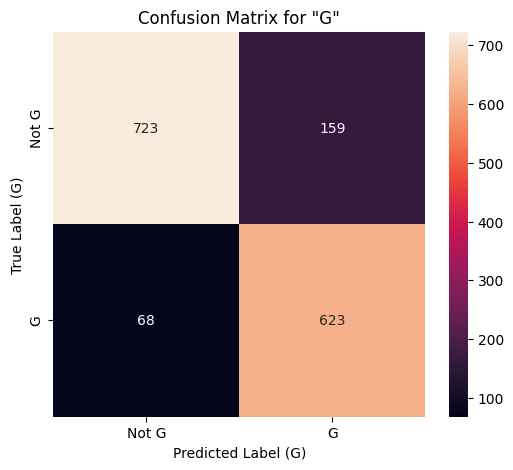

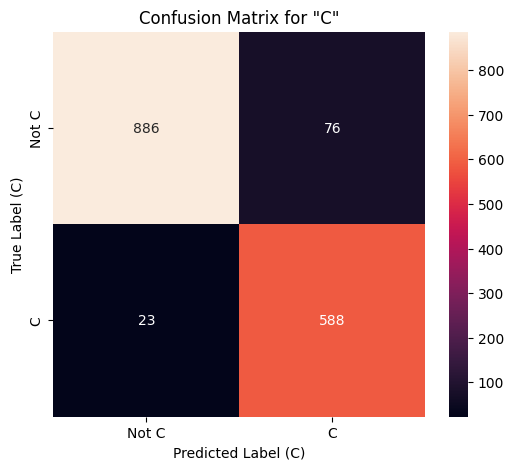

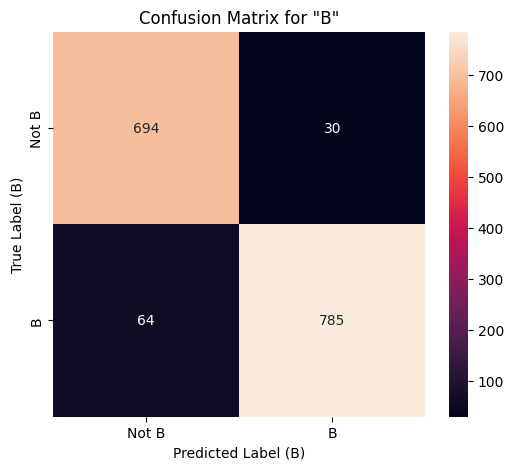

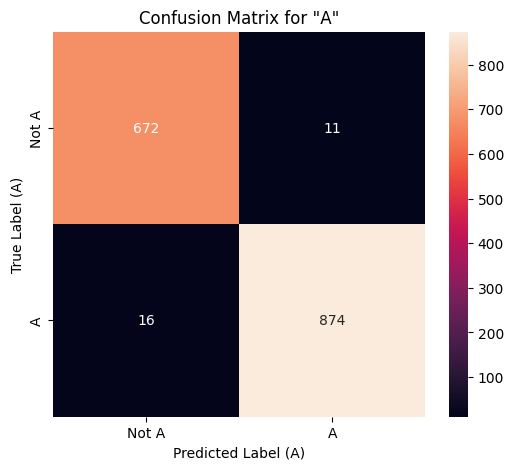

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_g = confusion_matrix(y_test[:, 0], test_predictions_binary[:, 0])
cm_c = confusion_matrix(y_test[:, 1], test_predictions_binary[:, 1])
cm_b = confusion_matrix(y_test[:, 2], test_predictions_binary[:, 2])
cm_a = confusion_matrix(y_test[:, 3], test_predictions_binary[:, 3])


plt.figure(figsize=(6, 5))
sns.heatmap(cm_g, annot=True, fmt='d', xticklabels=['Not G', 'G'], yticklabels=['Not G', 'G'])
plt.xlabel('Predicted Label (G)')
plt.ylabel('True Label (G)')
plt.title('Confusion Matrix for "G"')
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(cm_c, annot=True, fmt='d', xticklabels=['Not C', 'C'], yticklabels=['Not C', 'C'])
plt.xlabel('Predicted Label (C)')
plt.ylabel('True Label (C)')
plt.title('Confusion Matrix for "C"')
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(cm_b, annot=True, fmt='d', xticklabels=['Not B', 'B'], yticklabels=['Not B', 'B'])
plt.xlabel('Predicted Label (B)')
plt.ylabel('True Label (B)')
plt.title('Confusion Matrix for "B"')
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(cm_a, annot=True, fmt='d', xticklabels=['Not A', 'A'], yticklabels=['Not A', 'A'])
plt.xlabel('Predicted Label (A)')
plt.ylabel('True Label (A)')
plt.title('Confusion Matrix for "A"')
plt.show()
